In [1]:
import os, json, random
from pathlib import Path

while ".git" not in os.listdir(os.getcwd()): prj_dir = os.chdir(Path(os.getcwd())/"..")
os.getcwd()

from utils.boxes import xywh2xy_xy

In [2]:
source_name = 'svd'
data_folder = Path(f'data/sources/{source_name}')

In [3]:
images_base = {f: data_folder/'images'/f for f in os.listdir(data_folder/'images') if f.endswith(".jpg")}

with open(data_folder/'COCO_Tokyo Japan.json') as f:
    anno_base = json.load(f)

img_infos = {img['id']: { 
    'file_name': str(images_base[img['file_name']]),
    'height': img['height'],
    'width': img['width'],
    'annotations': []
} for img in anno_base['images']}

# print({c['id']: c['name']for c in anno_base['categories']})
for a in anno_base['annotations']:
    if a['category_id'] not in [1338238]:
        # img_infos[a['image_id']]['annotations'].append(a)
        img_infos[a['image_id']]['annotations'].append(a)

print(len(img_infos))

100


In [5]:
with open(f'data/unified/sources/{source_name}.json', 'w') as f:
    json.dump(list(img_infos.values()), f, indent = 4)

img_infos[1]

{'file_name': 'data/sources/svd/images/Screenshot 2022-09-02 183522.jpg',
 'height': 887,
 'width': 1833,
 'annotations': [{'id': 1,
   'image_id': 1,
   'segmentation': [[106.59,
     178.07,
     106.59,
     197.04,
     132.03,
     197.04,
     132.03,
     178.07]],
   'iscrowd': 0,
   'bbox': [106.59, 178.07, 25.439999999999998, 18.97],
   'area': 482,
   'category_id': 1338236},
  {'id': 2,
   'image_id': 1,
   'segmentation': [[90.69,
     349.34,
     90.69,
     372.34,
     105.1,
     372.34,
     105.1,
     349.34]],
   'iscrowd': 0,
   'bbox': [90.69, 349.34, 14.409999999999997, 23.0],
   'area': 331,
   'category_id': 1338236},
  {'id': 3,
   'image_id': 1,
   'segmentation': [[118.78,
     461.23,
     118.78,
     483.02,
     154.68,
     483.02,
     154.68,
     461.23]],
   'iscrowd': 0,
   'bbox': [118.78, 461.23, 35.900000000000006, 21.789999999999964],
   'area': 782,
   'category_id': 1338236},
  {'id': 4,
   'image_id': 1,
   'segmentation': [[73.62,
     47

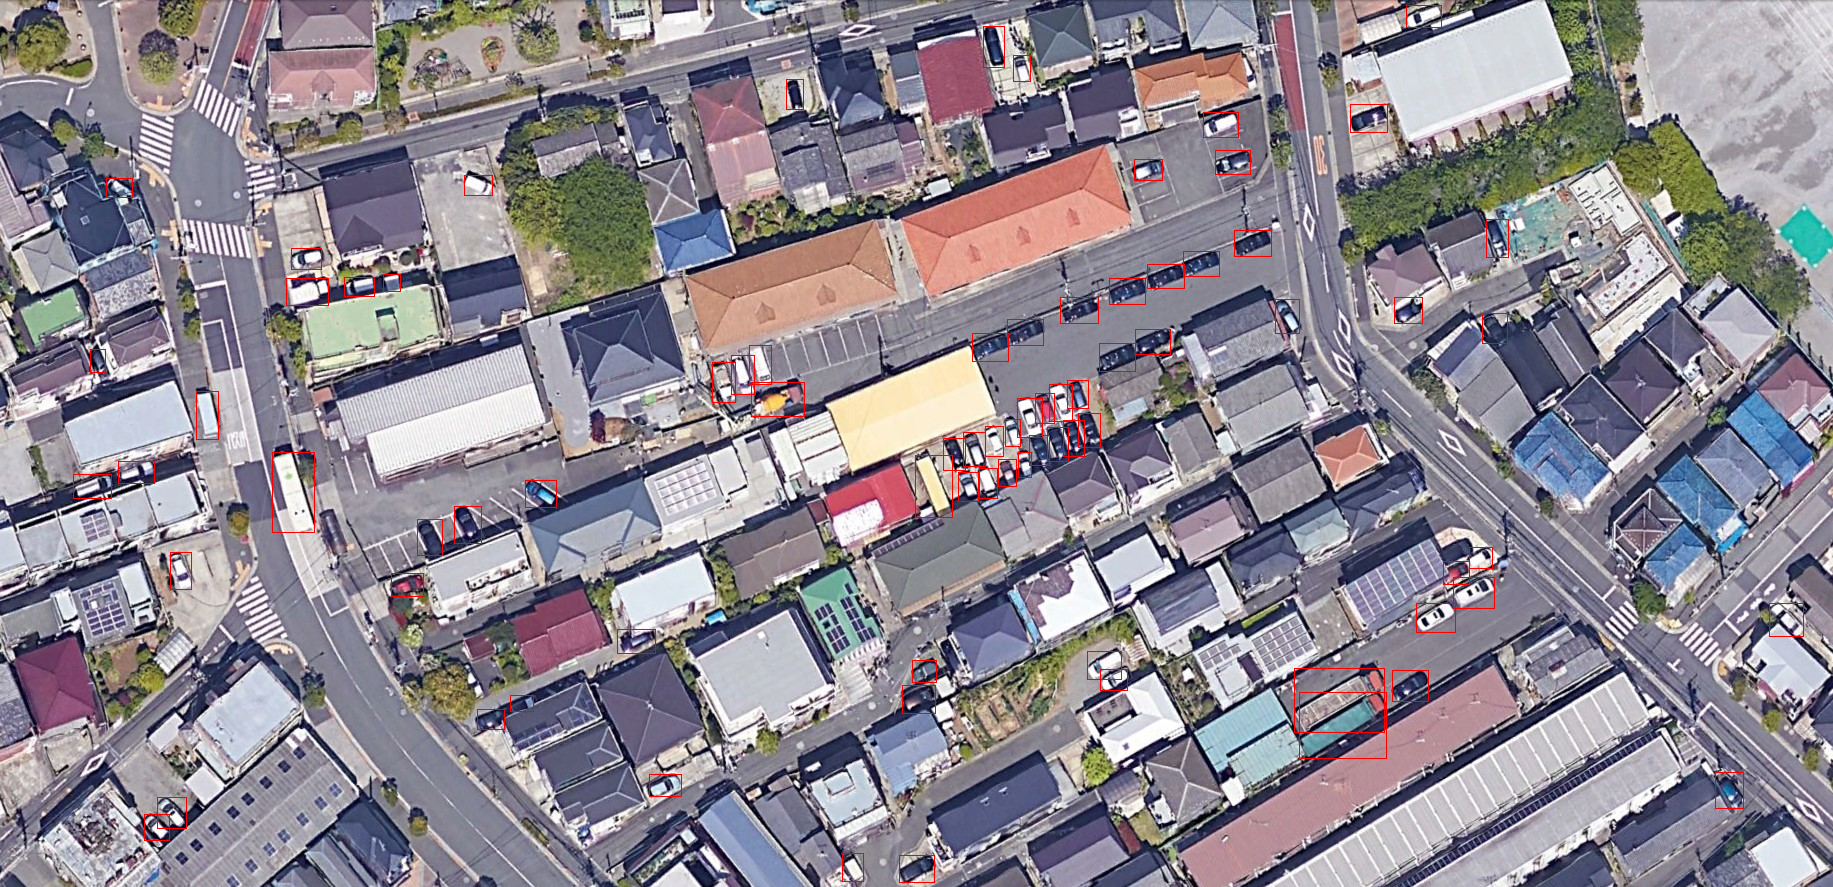

In [6]:
from PIL import Image, ImageDraw

def drawTest(img_info):
    img = Image.open(img_info['file_name'])
    draw = ImageDraw.Draw(img)

    for a in img_info['annotations']:
        draw.rectangle(xywh2xy_xy(a['bbox']), outline="red", width=1)

    display(img)    


keys_s = list(img_infos.keys())
# random.shuffle(keys_s)

for i in range(1):
    k = keys_s[i]
    img_info = img_infos[k]
    drawTest(img_info)